Para generar datasets sintéticos: https://guoguibing.github.io/librec/datagen.html

In [37]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

In [14]:
data = pd.read_csv("../data/toy_example.csv")
data.iloc[[10,48,61], 0] = np.nan
data.iloc[[22, 34], 1] = np.nan
data.head()

,antiguedad,n_medio_productos,impago
0,4.225,1.20,0
1,5.175,1.40,0
2,6.325,1.55,0
3,7.275,1.60,0
4,8.075,1.45,0


In [15]:
data.describe()

,antiguedad,n_medio_productos,impago
count,93.000000,94.000000,96.000000
mean,4.822312,3.442553,0.416667
std,2.698202,1.306517,0.495595
min,0.425000,1.200000,0.000000
25%,2.375000,2.362500,0.000000
50%,5.125000,3.350000,0.000000
75%,7.225000,4.575000,1.000000
max,9.475000,5.700000,1.000000


<Axes: xlabel='antiguedad', ylabel='n_medio_productos'>

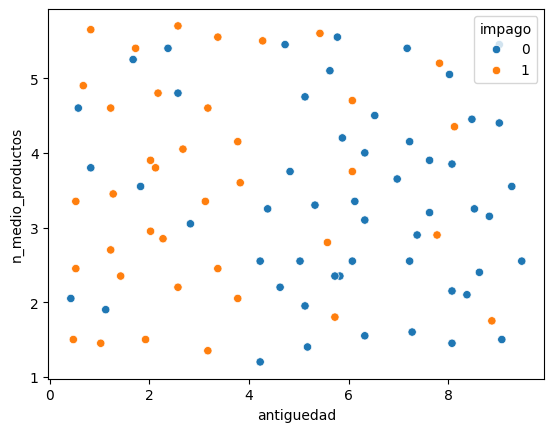

In [16]:
sns.scatterplot(data = data, x='antiguedad', y='n_medio_productos', hue='impago')

## 1st Round
* **STAKEHOLDER**:
    - Necesito clasificar a mis clientes en función a su riesgo de impago en base a su antigüedad como cliente y el número medio de productos al año.
* **DATA SCIENTIST**:
    - Sure! Voy a usar un vecinos próximos (k-NN) que en sencillito y el problema no parece muy complicado.
    - Por supuesto yo sé que en el caso de k-NN tengo que normalizar los datos e imputar missing values. También voy a dividir mis datos en training y test y sé que el cojunto de test no lo puedo utilizar para nada, más que para evaluar el resultado final de mi modelo.
    - ¡Manos a la obra!

In [17]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='impago').copy()
y = data['impago'].copy()

# FIX a random_state to make your pipeline reproducible!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### TRAIN

In [23]:
## TRAIN

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X_train)

X_train_transf = ss.transform(X_train)

clf = KNeighborsClassifier(n_neighbors=5)

clf.fit(X_train_transf, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

- He empezado por el modo en que alguien sabe usar sklearn básico y no se hace los cálculos "a mano".
- Diagrama en mi cabeza...

Accuracy in train:  1.0


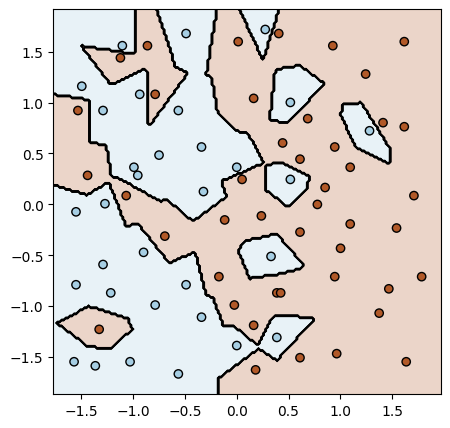

In [39]:
## TRAIN V2
from plot_decision_boundary import plot_decision_boundary
from sklearn.metrics import accuracy_score

ss = StandardScaler(with_mean=True, with_std=True)
X_train_transform_ss = ss.fit_transform(X_train)

si = SimpleImputer(strategy='mean')
X_train_transform_ss_si = si.fit_transform(X_train_transform_ss)

clf = KNeighborsClassifier(n_neighbors=1)

clf.fit(X_train_transform_ss_si, y_train)

plot_decision_boundary(clf, X_train_transform_ss_si, y_train)

print("Accuracy in train: ", accuracy_score(y_train, clf.predict(X_train_transform_ss_si)))


# save: DISCLAIMER: model registry
with open(os.path.join('pkl','standard_scaler.pkl'),'wb') as f:
    pickle.dump(ss,f)

with open(os.path.join('pkl','simple_imputer.pkl'),'wb') as f:
    pickle.dump(si,f)

with open(os.path.join('pkl','knn.pkl'),'wb') as f:
    pickle.dump(clf,f)

### PREDICT
- Drama

In [53]:
# load
with open(os.path.join('pkl','standard_scaler.pkl'), 'rb') as f:
    ss = pickle.load(f)

with open(os.path.join('pkl','simple_imputer.pkl'), 'rb') as f:
    si = pickle.load(f)


with open(os.path.join('pkl','knn.pkl'), 'rb') as f:
    clf = pickle.load(f)

X_test_transf_ss = ss.transform(X_test)
X_test_transf_ss_si = si.transform(X_test_transf_ss)

print("Accuracy in test: ", accuracy_score(y_test, clf.predict(X_test_transf_ss_si)))

Accuracy in test:  0.6


# 2nd Round

### TRAIN